In [9]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
np.random.seed(0)
%matplotlib inline  

In [7]:
df = pd.read_csv('data/final.csv')

In [24]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit_0',
       'explicit_1', 'genre', 'instrumentalness', 'key_0', 'key_1', 'key_10',
       'key_11', 'key_12', 'key_13', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'liveness', 'loudness', 'mode_0',
       'mode_1', 'mode_2', 'mode_3', 'speechiness', 'tempo',
       'time_signature_0', 'time_signature_1', 'time_signature_2',
       'time_signature_3', 'time_signature_4', 'time_signature_5', 'track_id',
       'valence', 'year_1962', 'year_1963', 'year_1965', 'year_1966',
       'year_1967', 'year_1968', 'year_1969', 'year_1970', 'year_1971',
       'year_1972', 'year_1973', 'year_1974', 'year_1975', 'year_1976',
       'year_1977', 'year_1978', 'year_1979', 'year_1980', 'year_1981',
       'year_1982', 'year_1983', 'year_1984', 'year_1985', 'year_1986',
       'year_1987', 'year_1988', 'year_1989', 'year_1990', 'year_1991',
       'year_1992', 'year_1993', 'year_1994', 'year_1995'

In [11]:
y = df['genre']
X = df.drop(columns=['genre','track_id'], axis=1)

In [26]:
agg_clust = AgglomerativeClustering(n_clusters=4)
assigned_clust = agg_clust.fit_predict(X)

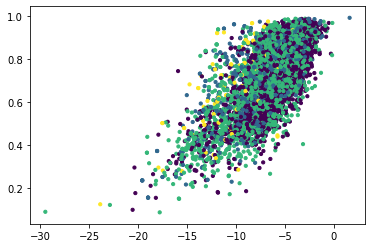

In [27]:
plt.scatter(df.loudness, df.energy, c=assigned_clust, s=10);